In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
lblen = LabelEncoder()
data["ShelveLoc"]= lblen.fit_transform(data["ShelveLoc"])
data["Urban"]= lblen.fit_transform(data["Urban"])
data["US"]= lblen.fit_transform(data["US"])
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [4]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True)

In [6]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=5)

In [7]:
y_pred=model.predict(x_test)

In [8]:
mape(y_test,y_pred)

0.28839622194972747

In [9]:
np.mean(abs(y_test-y_pred)/y_test)

0.28839622194972747

In [10]:
abs(y_test-y_pred)/y_test
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


[Text(251.59821428571428, 498.3, 'Price <= 89.5\nmse = 8.106\nsamples = 280\nvalue = 7.479'),
 Text(104.62499999999999, 407.70000000000005, 'ShelveLoc <= 0.5\nmse = 4.366\nsamples = 37\nvalue = 10.363'),
 Text(49.82142857142857, 317.1, 'CompPrice <= 123.5\nmse = 2.517\nsamples = 11\nvalue = 8.844'),
 Text(29.89285714285714, 226.5, 'Education <= 17.5\nmse = 0.568\nsamples = 7\nvalue = 7.926'),
 Text(19.928571428571427, 135.89999999999998, 'Population <= 120.0\nmse = 0.284\nsamples = 6\nvalue = 7.693'),
 Text(9.964285714285714, 45.299999999999955, 'mse = 0.0\nsamples = 1\nvalue = 6.64'),
 Text(29.89285714285714, 45.299999999999955, 'mse = 0.075\nsamples = 5\nvalue = 7.904'),
 Text(39.857142857142854, 135.89999999999998, 'mse = -0.0\nsamples = 1\nvalue = 9.32'),
 Text(69.75, 226.5, 'Age <= 78.5\nmse = 1.872\nsamples = 4\nvalue = 10.45'),
 Text(59.78571428571428, 135.89999999999998, 'Price <= 83.5\nmse = 0.124\nsamples = 3\nvalue = 11.22'),
 Text(49.82142857142857, 45.299999999999955, 'mse

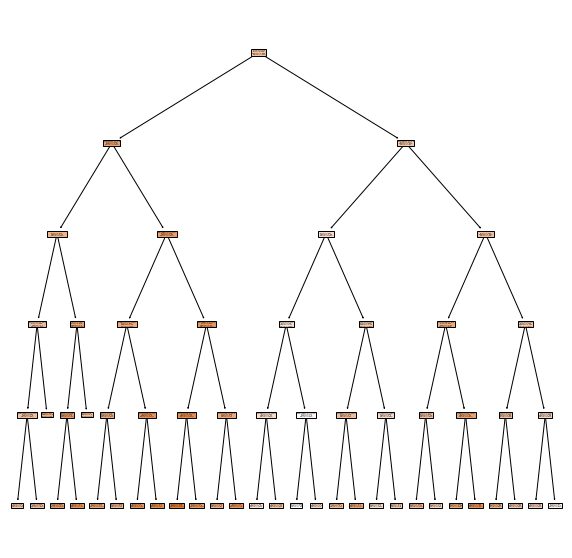

In [17]:
plt.figure(figsize=(10,10))
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
tree.plot_tree(model,feature_names=fn,filled=True)